# Imports

In [58]:
# libraries
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt

# our code
from solver import squared_distance, BTSPSolverCP

# Bottleneck Traveling Salesman Problem
The Bottleneck Traveling Salesman Problem (BTSP) is a variation of the classical Traveling Salesman Problem (TSP) where the objective is to minimize the cost of the most expensive edge used in the tour.

*More formally, given a complete graph G=(V,E) with non-negative edge weights d_{ij} for all i,j\in V, the goal is to find a Hamiltonian cycle C in G such that the weight of the heaviest edge in C is minimized.

*Sei H_G = {C_1 … C_n} die Menge von Hamiltonian cycle in G.
Suche ein C in H_G, sodass max(e) von C <= max(e ) von C_i in H_G, C_i != C

## Utils

In [59]:
def random_points(n, w=10_000, h=10_000):
    """
    Generate a list of n randomly placed points on the w x h grid.
    """
    return [(random.randint(0,w), random.randint(0,h)) for _ in range(n)]

def draw_btsp_edges(edges):
    """
    Draw the edges of a DBST. The bottleneck edge(s) automatically get highlighted.
    """
    points = set([e[0] for e in edges] + [e[1] for e in edges])
    draw_graph = nx.empty_graph()
    draw_graph.add_nodes_from(points)
    draw_graph.add_edges_from(edges)
    g_edges = draw_graph.edges()
    max_length = max((squared_distance(*e) for e in g_edges))
    color = [('red' if squared_distance(*e) == max_length else 'black') for e in g_edges]
    width = [(1.0 if squared_distance(*e) == max_length else 0.5) for e in g_edges]
    plt.clf()
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(8,8)
    ax.set_aspect(1.0)  # 1:1 aspect ratio
    nx.draw_networkx(draw_graph, pos={p: p for p in points}, node_size=8,
                     with_labels=False, edgelist=g_edges, edge_color=color, width=width, ax=ax)
    plt.show()

## Solve something

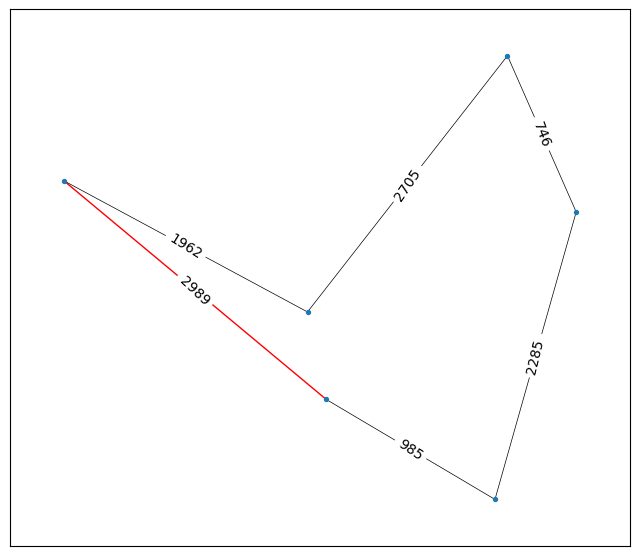

In [60]:
#random.seed(1234567) # remove if you want random instances
solver = BTSPSolverCP(random_points(4))
draw_btsp_edges(solver.solve())